<a href="https://colab.research.google.com/github/joSanchez28/BERT_on_tweets/blob/master/Libreta1_Divisi%C3%B3n_del_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libreta 1 - División del conjunto de datos

En esta primera libreta dividiremos el conjunto de datos "training.1600000.processed.noemoticon.csv" en 3 conjuntos. Un primer conjunto que usaremos para entrenar, otro como conjunto de validación y un último conjunto de test.

El conjunto de dato "training.1600000.processed.noemoticon.csv" está formado por tweets en los que aparecían emoticonos y que han sido etiquetados como positivos o negativos solo en función de dichos emoticonos. Puedes descargar este conjunto en el siguiente enlace: https://www.kaggle.com/kazanova/sentiment140 .

Al final de esta libreta también veremos algunos datos interesantes sobre la distribución del número de palabras y de caracteres de los tweets con los que entrenaremos.



Cargamos los paquetes necesarios



In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

Cargamos el conjunto de datos y lo metemos en un dataframe de pandas. Cabe comentar que yo lo cargaré desde mi drive (ya que estoy trabajando mediante la plataforma Google Colab).


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Parámetros del DATASET
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8
#Lo cargamos
dataset_filename = "training.1600000.processed.noemoticon.csv"
data_path = "/content/drive/My Drive/Datos/" 
dataset_path = data_path + dataset_filename
print("Se leerá el fichero:", dataset_path)
data_df = pd.read_csv(dataset_path, encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

Se leerá el fichero: /content/drive/My Drive/Datos/training.1600000.processed.noemoticon.csv


Podemos imprimir las primeras filas para hacernos una idea de cómo es el conjunto.


In [0]:
data_df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


En concreto, el target 0 señala que se trata de un tweet negativo, mientras que el target 4 indica que es positivo. Vemos que hay el mismo número de tweets negativos que de tweets positivos.


In [0]:
data_df.target.value_counts()

4    800000
0    800000
Name: target, dtype: int64

### Creamos los conjuntos de entrenamiento, validación y test
Utilizamos de forma sencilla la función 'train_test_split' de la librería sckit-learn.


In [0]:
df_train, df_test = train_test_split(data_df, test_size = 1 - TRAIN_SIZE, random_state = 0, stratify = data_df.target.values)
df_val, df_test = train_test_split(df_test, test_size = 0.5, random_state = 0, stratify = df_test.target.values)

Una vez tenemos la división, podemos comprobar cual es el tamaño de los diferentes conjuntos y si, como cabría esperar, la distribución de los tweets positivos-negativos es la misma en todos ellos (esto es, si en todos ellos hay el mismo número de tweets positivos que de tweets negativos).

In [0]:
#Tamaño del conjunto de entrenamiento
df_train.shape

(1280000, 6)

In [0]:
df_train.target.value_counts()

4    640000
0    640000
Name: target, dtype: int64

In [0]:
df_test.shape

(160000, 6)

In [0]:
df_test.target.value_counts()

4    80000
0    80000
Name: target, dtype: int64

In [0]:
df_val.shape

(160000, 6)

In [0]:
df_val.target.value_counts()

4    80000
0    80000
Name: target, dtype: int64

Hechas todas las comprobaciones oportunas, procedemos a guardar estos conjuntos en archivos csv (para que puedan ser usados en las siguientes libretas).

In [0]:
df_train.to_csv(data_path + "train_set.csv")
df_val.to_csv(data_path + "val_set.csv")
df_test.to_csv(data_path + "test_set.csv")

### Distribución del número de palabras y caracteres en los tweets de entrenamiento
Una vez hecha la división en los conjuntos de entrenamiento, validación y test, vamos a ver algunas características de la distribución del número de palabras y caracteres en los tweets de entrenamiento. En concreto, conocer la distribución del número de palabras de los tweets nos servirá en las siguientes libretas para darnos una idea de qué longitud máxima le deberíamos dar a las entradas de BERT a la hora de entrenar. (Dar una longitud muy alta no es buena idea porque debido a esto podría multiplicarse el tiempo de entrenamiento).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


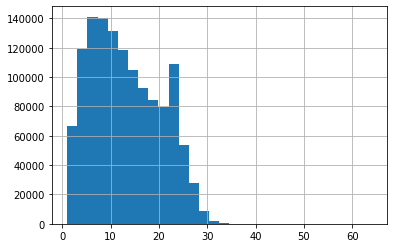

In [0]:
df_train["n_words"] = df_train["text"].str.split().str.len()
df_train["n_words"].hist(bins = 30)

In [0]:
df_train["n_words"].value_counts()

7     71532
8     70902
6     69636
9     69570
10    66960
5     64627
11    64244
12    60953
13    57469
4     54283
14    54269
15    50863
16    47986
17    44897
18    43122
3     41687
19    41369
20    41280
21    38658
22    38297
23    36458
24    34026
25    29905
26    23871
2     20012
27    16982
28    10622
29     5882
1      4792
30     2861
31     1268
32      464
33      166
34       52
35       19
36        5
39        3
37        2
58        1
38        1
41        1
44        1
57        1
64        1
Name: n_words, dtype: int64

Aunque en la práctica no nos va a servir de mucho, vemos también la distribución del número de carácteres por tweet.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


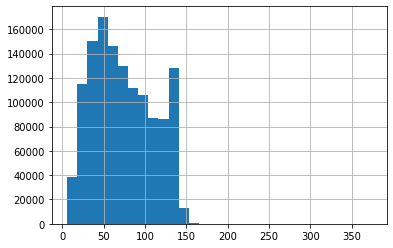

In [0]:
df_train["n_characters"] = df_train["text"].str.len()
df_train["n_characters"].hist(bins = 30)

Si lo hacemos sin contar los espacios como carácteres el número bajará un poco.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


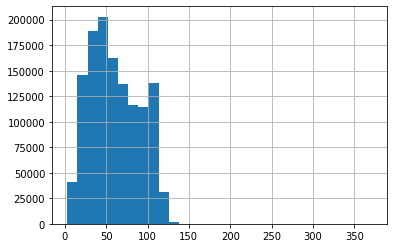

In [0]:
df_train["n_characters"] = df_train["text"].str.replace(' ', '').str.replace('\t', '').str.replace('\n', '').str.len()
df_train["n_characters"].hist(bins = 30)